In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')


In [18]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])


PetImages\Cat\0.jpg 0


In [19]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages\Cat\3994.jpg      0
1  PetImages\Cat\3308.jpg      0
2  PetImages\Cat\4811.jpg      0
3  PetImages\Cat\7491.jpg      0
4  PetImages\Dog\1809.jpg      1

In [20]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages\Dog\Thumbs.db
PetImages\Cat\Thumbs.db


In [21]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages\\Dog\\Thumbs.db', 'PetImages\\Cat\\Thumbs.db']

In [22]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24961

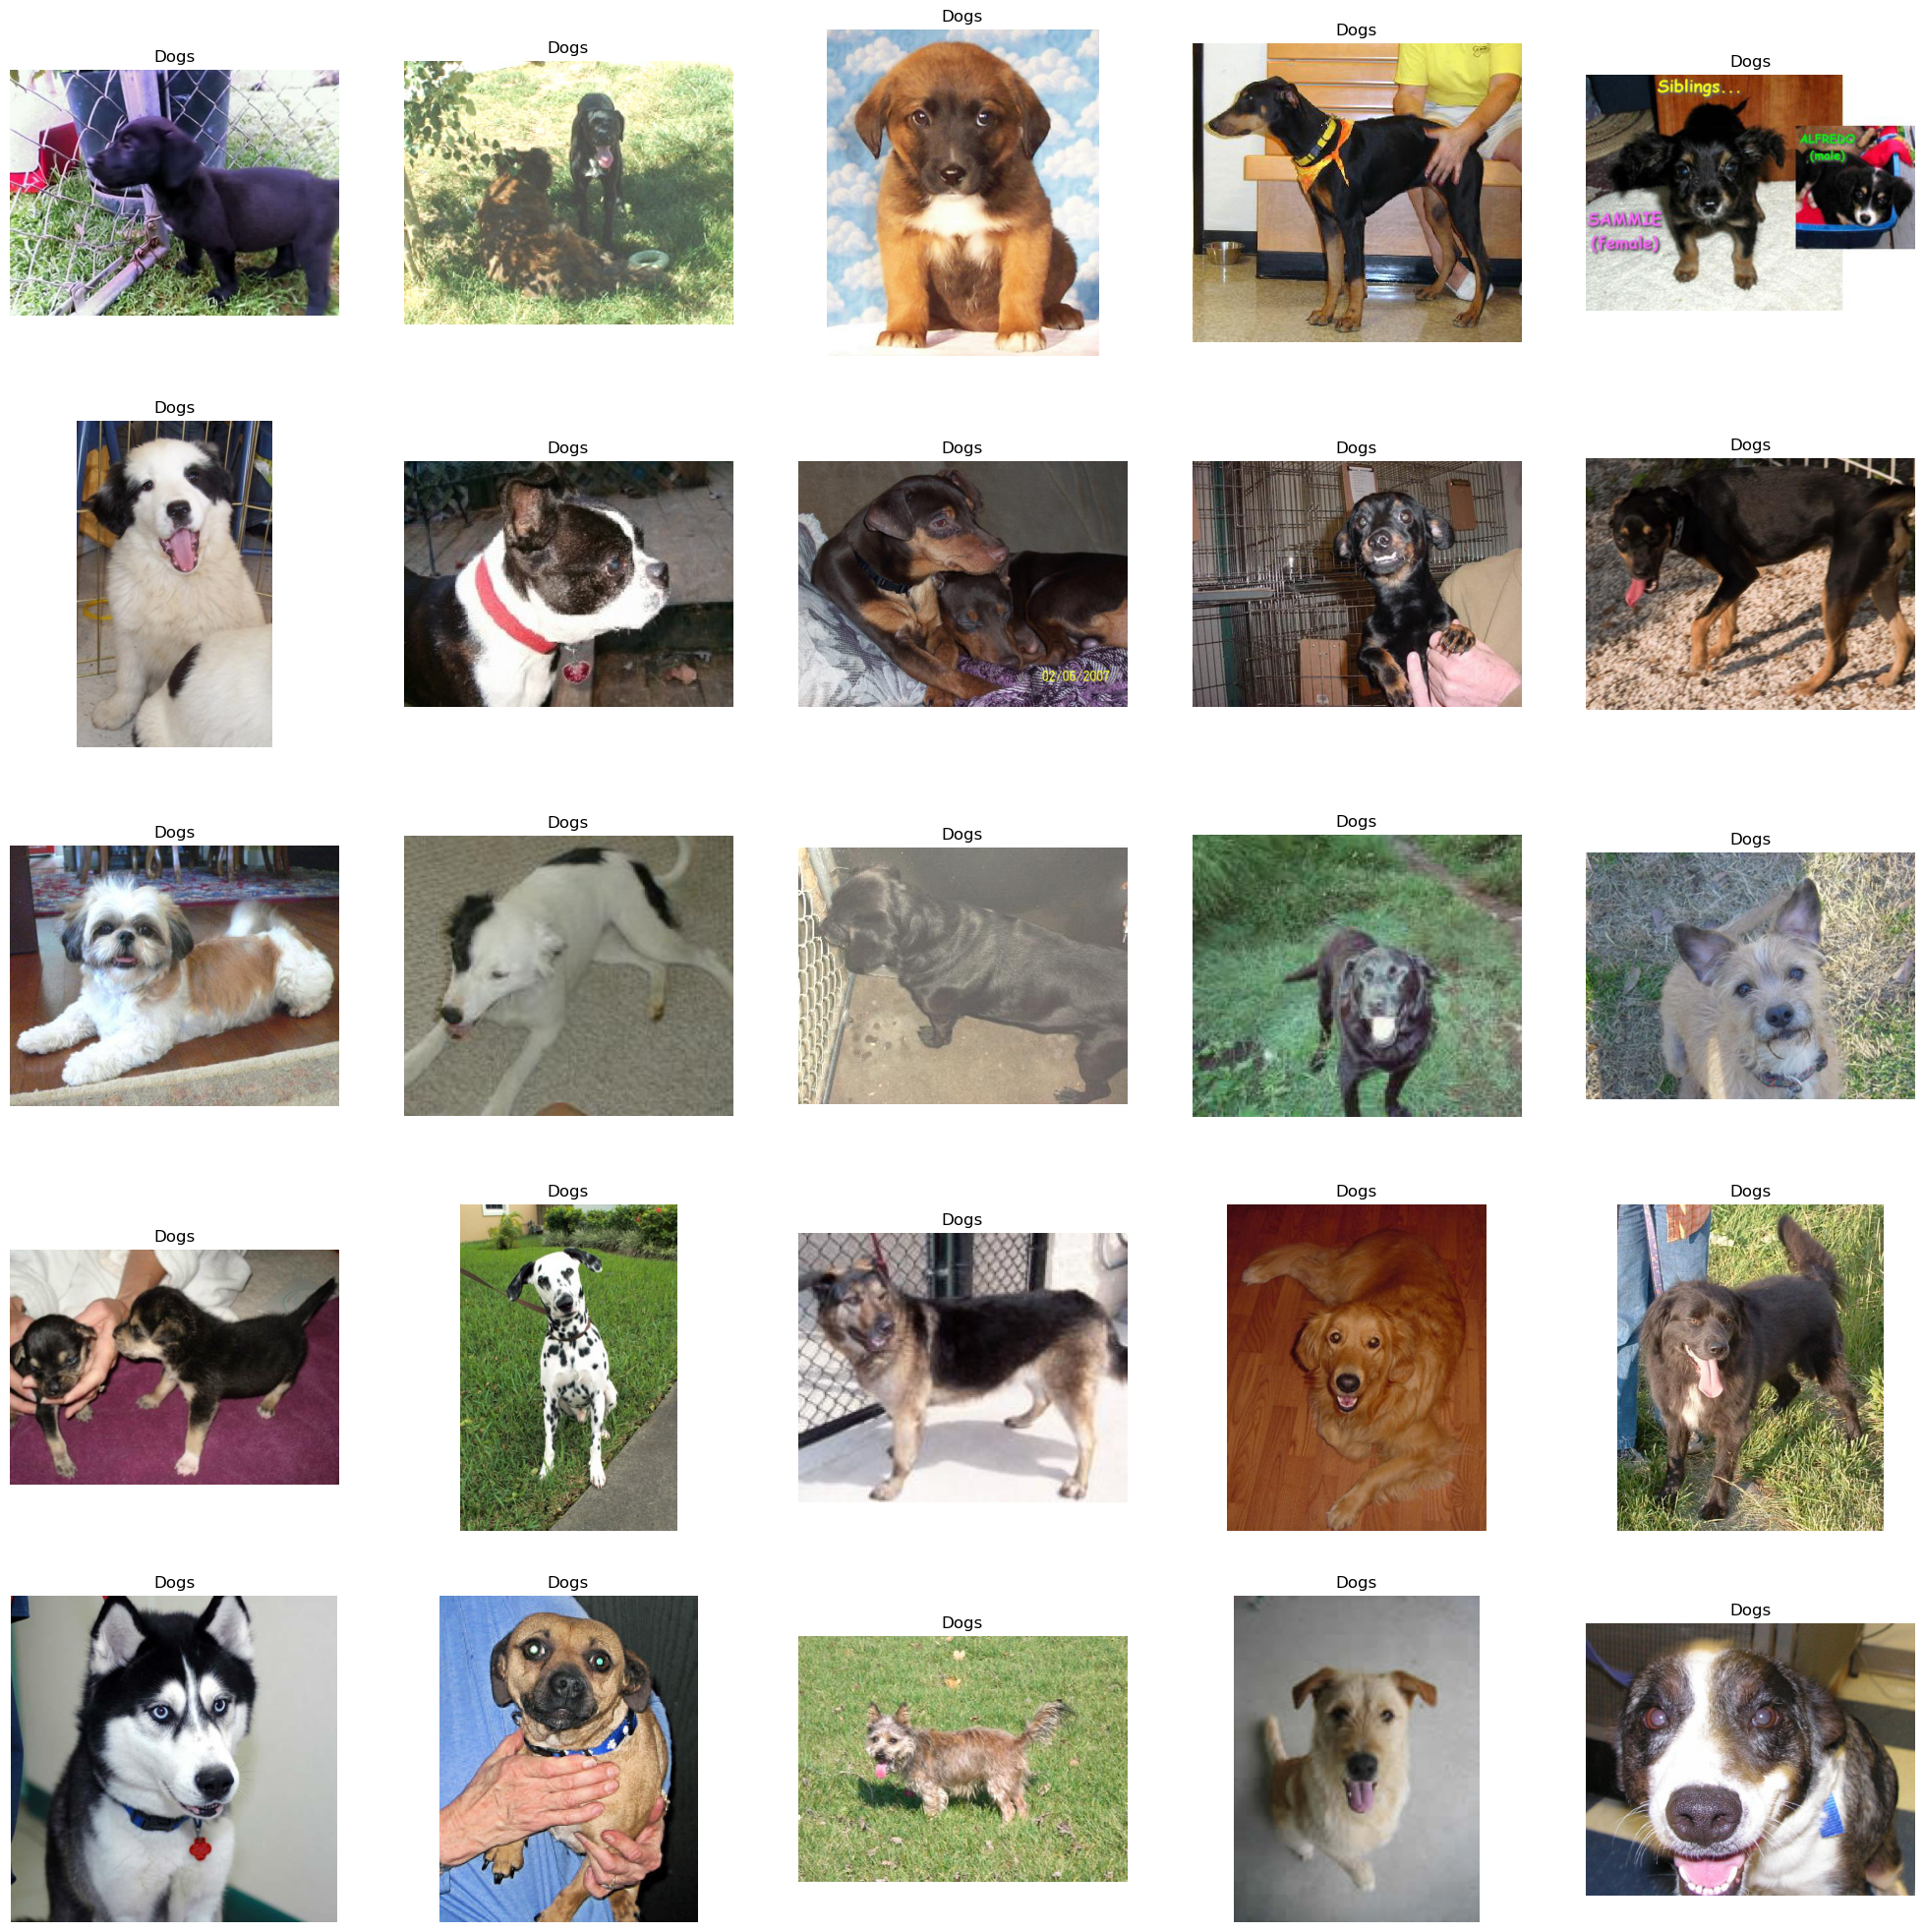

In [23]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

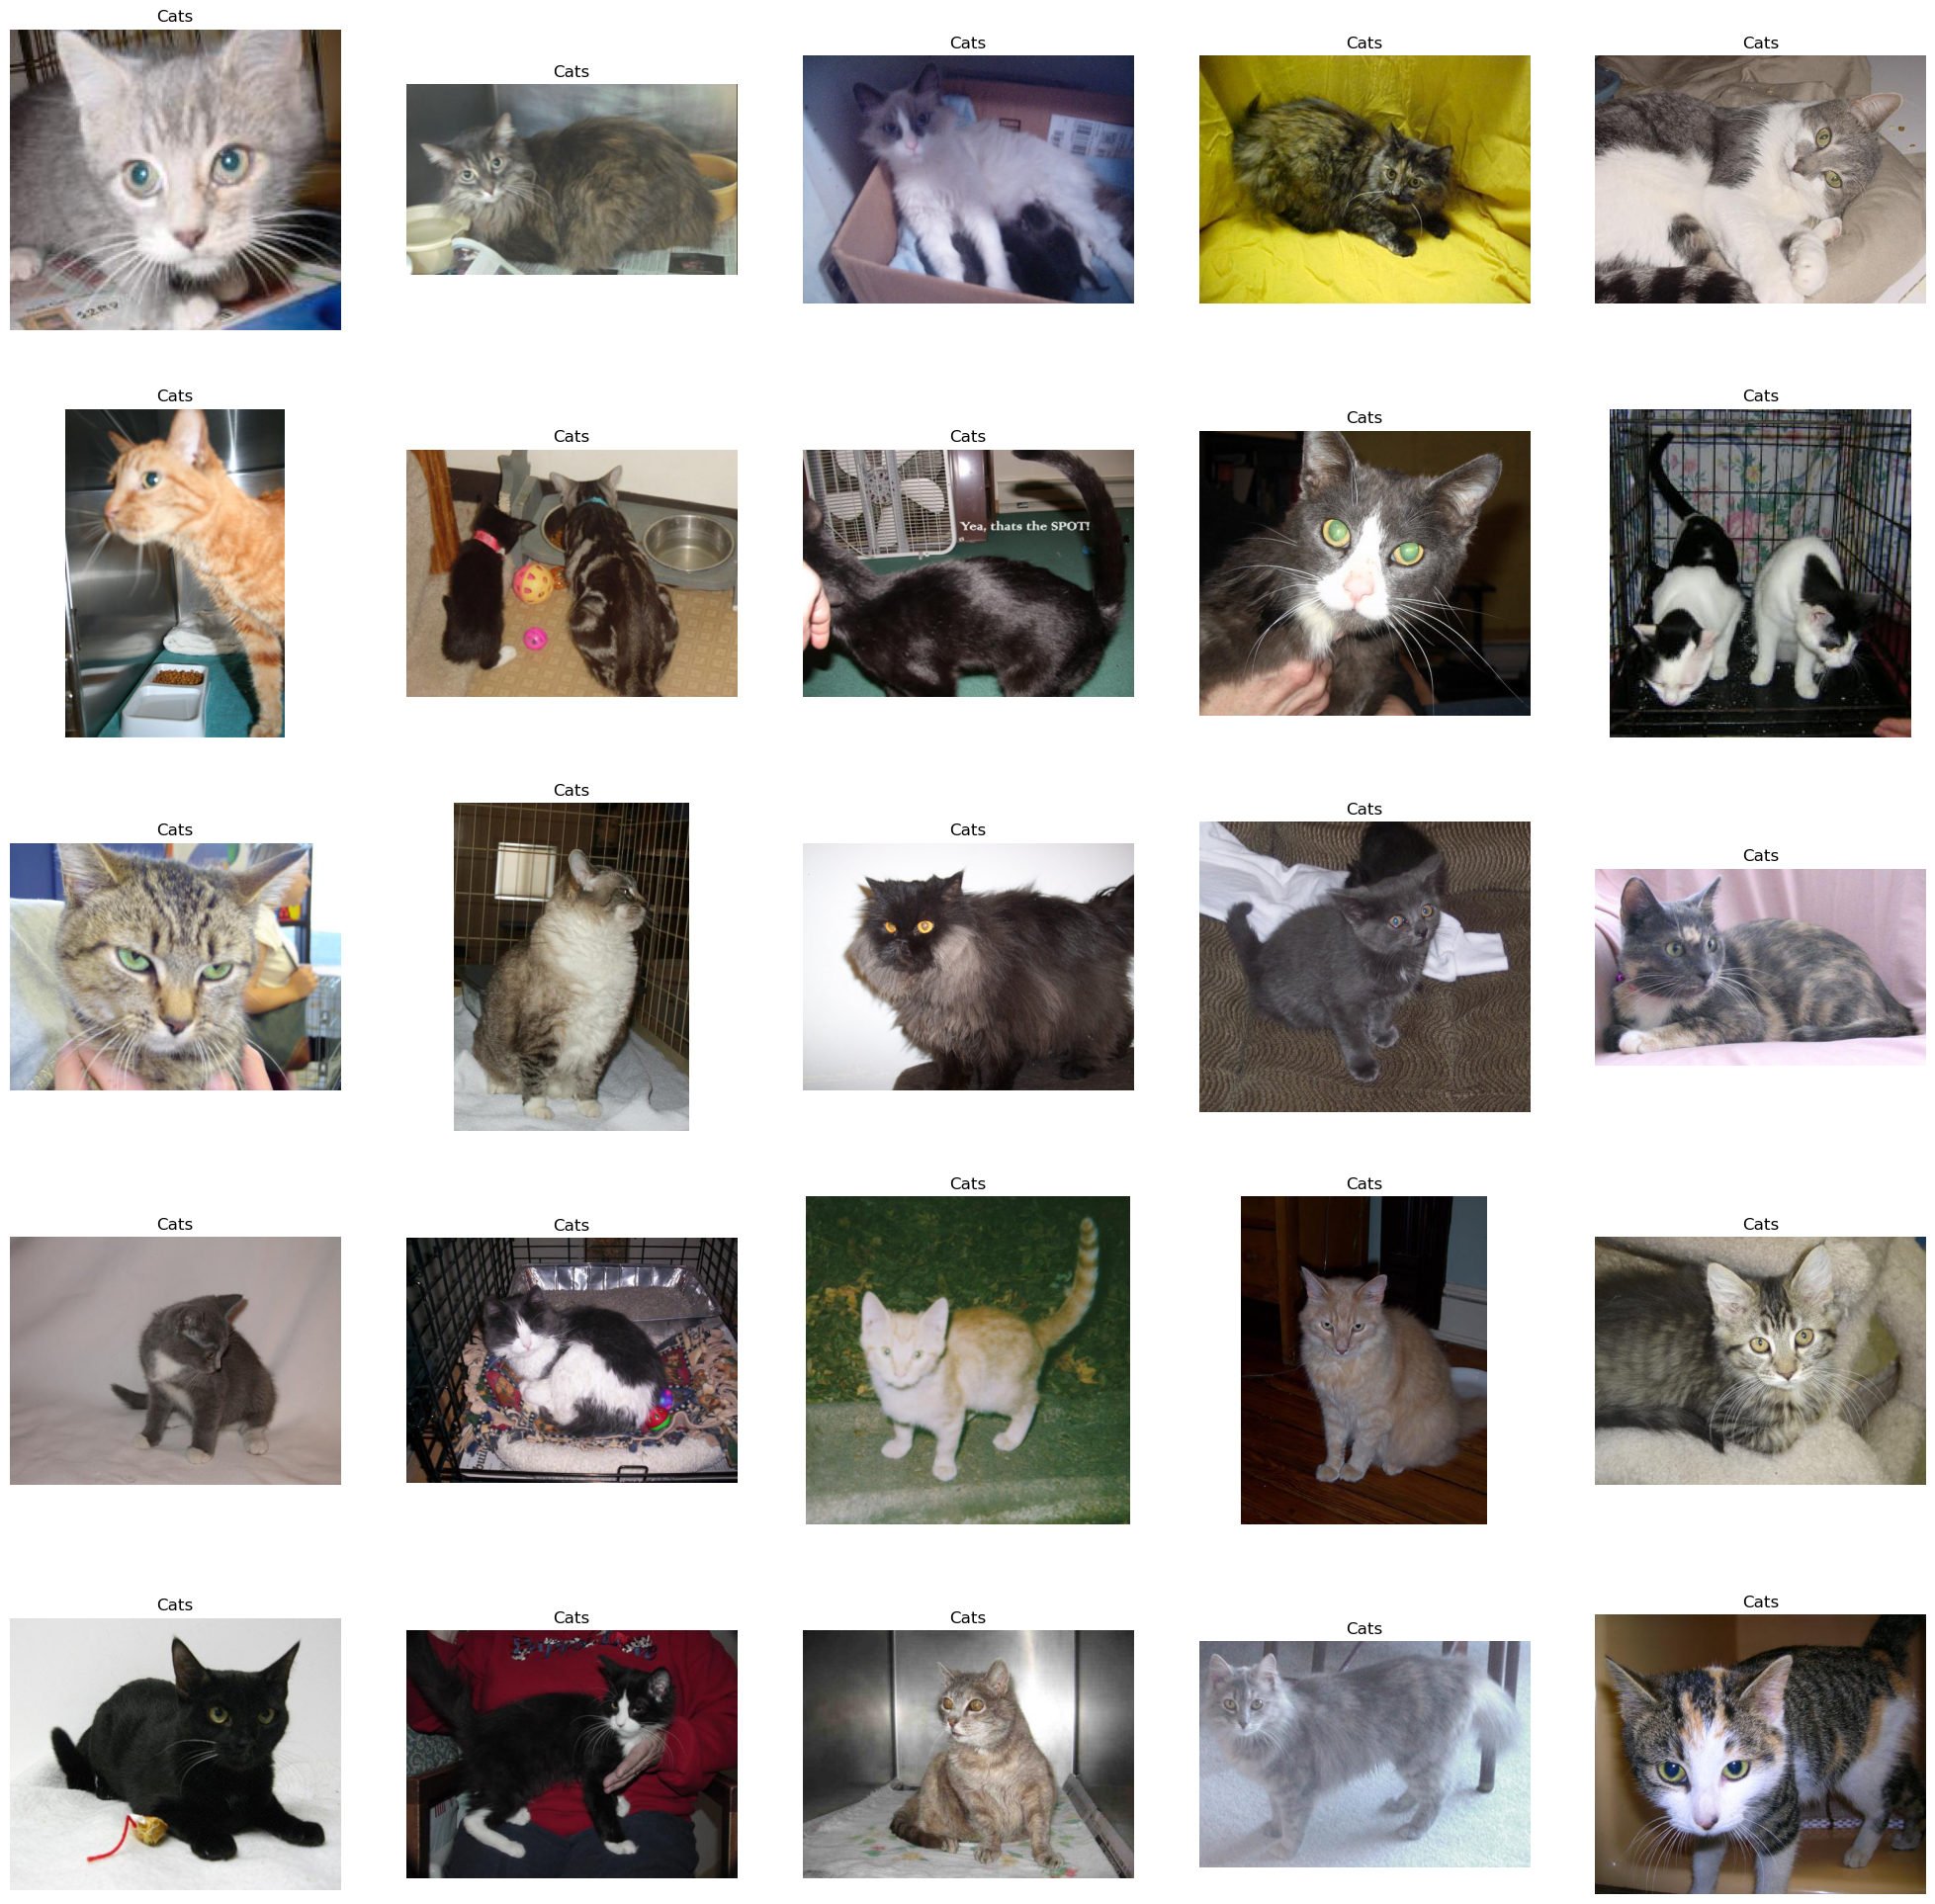

In [24]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

In [36]:
# import seaborn as sns
# sns.countplot(df['label'])

In [26]:
df['label'] = df['label'].astype('str')


In [27]:
df.head()


images label
0  PetImages\Cat\3994.jpg     0
1  PetImages\Cat\3308.jpg     0
2  PetImages\Cat\4811.jpg     0
3  PetImages\Cat\7491.jpg     0
4  PetImages\Dog\1809.jpg     1

In [28]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19967 validated image filenames belonging to 2 classes.
Found 4992 validated image filenames belonging to 2 classes.


In [31]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)       

In [33]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Epoch 1/10
39/39 [==============================] - 257s 7s/step - loss: 0.7154 - accuracy: 0.5571 - val_loss: 0.6330 - val_accuracy: 0.6424
Epoch 2/10
39/39 [==============================] - 263s 7s/step - loss: 0.6229 - accuracy: 0.6549 - val_loss: 0.5943 - val_accuracy: 0.6803
Epoch 3/10
39/39 [==============================] - 241s 6s/step - loss: 0.5765 - accuracy: 0.6968 - val_loss: 0.5513 - val_accuracy: 0.7200
Epoch 4/10
39/39 [==============================] - 260s 7s/step - loss: 0.5522 - accuracy: 0.7162 - val_loss: 0.5170 - val_accuracy: 0.7408
Epoch 5/10
39/39 [==============================] - 288s 7s/step - loss: 0.5314 - accuracy: 0.7325 - val_loss: 0.4873 - val_accuracy: 0.7620
Epoch 6/10
39/39 [==============================] - 261s 7s/step - loss: 0.4996 - accuracy: 0.7529 - val_loss: 0.4677 - val_accuracy: 0.7698
Epoch 7/10
39/39 [==============================] - 299s 8s/step - loss: 0.4875 - accuracy: 0.7620 - val_loss: 0.4458 - val_accuracy: 0.7933
Epoch 8/10
39

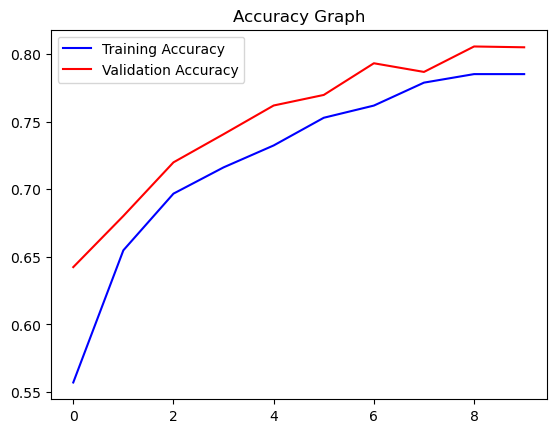

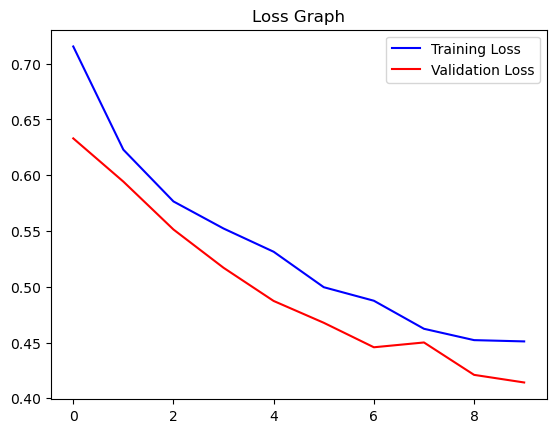

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [35]:
image_path = "test_img.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 409ms/step
Cat
